Mohammedanas Tai
50232665

# Project Two Report

### Introduction

There are many types of machine learning algorithms. One of the two that I worked with for this report was the K-Means and the KNN (K-Nearest-Neighbors). The KNN algorithm work with current given data, also known as training data, to help find labels corresponding to testing data given to the system. The training and testing data consists of images and labels of numbers. Each number of the label would be corresponding to the number in the image. The problem with this algorithm was that the more training data you gave it, the slower it would run due to the large amounts of given information to determine what’s the best possible fit for the testing data. A solution to this was to use the KMeans algorithm. This algorithm gives labels to data based on the number of clusters there are in the data. For example, if we have a ton of numbers in a clutter for the number `x`, then we can assume the algorithm will make the cluster and give it a label. We have the abiltity to choose how many clusters we would want this algorithm to create, giving us in advantage to help us minimize our KNN training data. In order to work this these two algorithms, I made two parts to this report. The first part we will analyze how program behaves when just using the KMeans algorithm. The second part we will analyze the KNN and KMeans algorithm together. We will see how it differs and which would be more optimal to use.

Below we are imported necessary libraries needed for this assignment.

In [10]:
from sklearn.cluster import KMeans #kmeans libaray
import matplotlib.pyplot as plt #helps plot graphs
import numpy as np #makes eaiser lists
import seaborn as sns #makes usefull plots
from sklearn.neighbors import KNeighborsClassifier #KNN libaray


We first start with accessing the files that have the images and the labels corresponding to the images. The numbers contained in the images consists of numbers from 0-9. So, we then create 10 clusters for the KMeans algorithm and see how well the program is able to distinguish each number.

## Part 1

In [11]:

#open files of images
with open("train-images.idx3-ubyte","rb") as foo:
    f_img = foo.read()
    
with open("train-labels.idx1-ubyte","rb") as foo:
    f_lab = foo.read()

#saves informatiom from file
images = np.array([b for b in f_img[16:]]).reshape(-1,28*28)
labels = np.array([b for b in f_lab[8:]])

#KMean clustering of the next two lines
km = KMeans(n_clusters=10)
b = km.fit(images)


Now that we have the clustering of images, we will print each cluster too see what the 10 clusters the algorithms produced

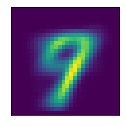

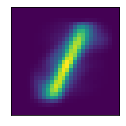

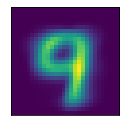

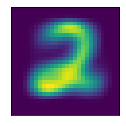

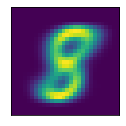

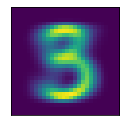

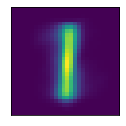

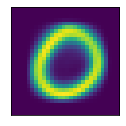

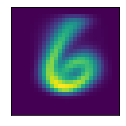

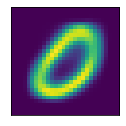

In [12]:
#a holds the images of the clusters
a = km.cluster_centers_
for i in range(0,10):
    img = a[i].reshape(28,28)
    plt.figure(figsize=(2,2))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img);

Observing the cluster of the images, there are a number of them that are repeated twice. For instance, numbers 9 and 1. This may happen because of the algorithm unable to distinguish different ways people may write a certain letter. If you look on the images again, you'll notice the number 3 slightly resembles the number 8 for the similar reason. Too get a better understanding of what the algorithm did we will plot a graph that shows us what cluster is showing which numbers.

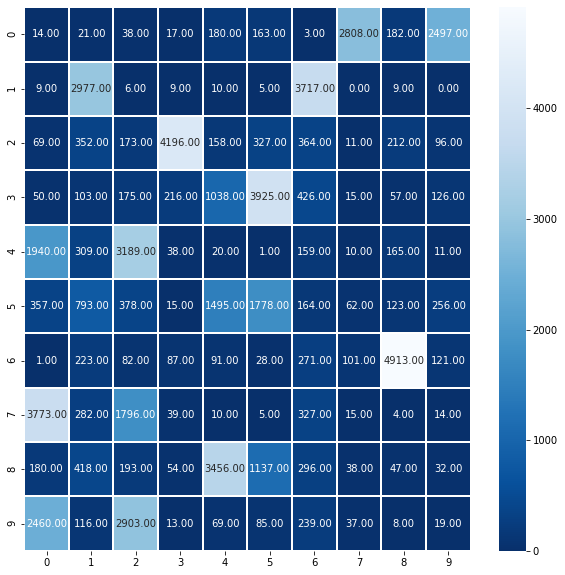

In [13]:
confusion = np.zeros((10,10),dtype=int) #intialize graph 
#adding values to the graph
for lab, pred in zip(labels,km.labels_):
    confusion[lab,pred] += 1

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(confusion,
           cmap='Blues_r',
            annot = True,
            annot_kws={"fontsize":10},
            linewidth=1,
            ax=ax,
            fmt=".2f"
           );



Looking at the graph, the x axis tells us the number of the cluster while the y axis is giving us the number of the label corresponding the cluster. The number in the boxes of the graph tells us in x cluster there are y labels. Looking at the values of the number of clusters for each label we can see that this isn’t a great way to help us distinguish different labels in our data. For example, the 0th cluster seems to have a large number of labels that include 4,7, and 9. We will use KMeans with more clusters with the KNN algorithm to see if it any more efficient. This concludes part 1 of just working with the KMeans algorithm. The next part we will combine KNN and KMeans to try to create a more efficient algorithm.

## Part 2

Here in order to combine KNN and KMeans I first have to divived my data into two parts. The training data and the testing data. For this report  I split the data in half, making the last half the training data and the first half testing data. I then went through the training data and made a cluster of 100 of each number from 0 to 9. For example, the number 0 has 100 clusters, 1 have 100 clusters,...etc. The cluster was made with using the KMeans algorithm. Each cluster has a known label, for instance the 0th cluster should have the label 0 and 1st cluster have label 1 and etc. Knowing that each cluster consist of 100 elements, I have a list containing labels of each cluster. This is how I created my new training data for my KNN algorithm. We at first had 30,000 trainng data to now only having 1000 training data. Using ths training data, I use my testing data to see how efficient is it labeling each of the new testing images. To see how accurate it is, I created a graph similar to the one in part 1. 

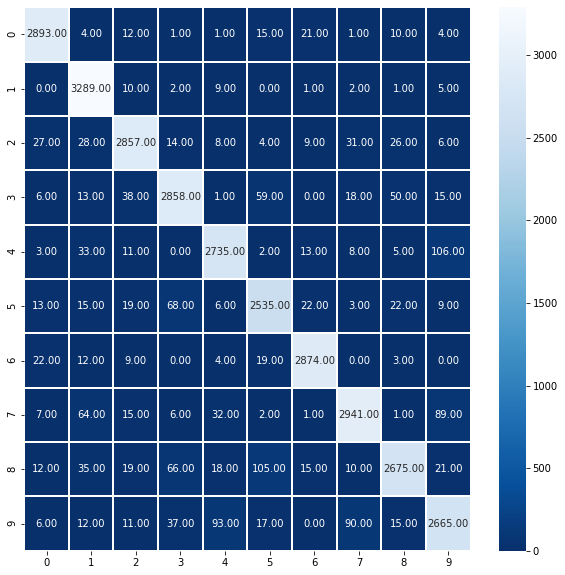

In [7]:
N = 30000


#Split data into training and testing
train_X = images[:N]
train_y = labels[:N]


test_X = images[N:]
test_y = labels[N:]


#inizilaize graph 
confusion = np.zeros((10,10),dtype=int)
#contains clusters for each number
clust_list = []

#for loop goes thru training data to create cluster of each number 0-10
for i in range(0,10):
    mylist = [] #list is to reset to make subets of each number 0-10
    n = 0 #this is too run thru the matrix every run to search for each subset
    for j in train_y:
        if j == i:
            
            mylist.append(train_X[n,:])

        n = n+1

    a = np.array(mylist)

    #kMeans Algorithm
    km = KMeans(n_clusters=100)
    b = km.fit(a)
    clust = km.cluster_centers_
    clust_list.append(clust)



    
    
    
a = np.array(clust_list).reshape(-1,28*28)
#making label of each cluster
label_list = []
l = 0
for i in range(0,1000):
    label_list.append(l)
    if i%100 == 0 and i != 0:
        l = l+1

#KNN algorithm 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(a ,label_list)
label = knn.predict(test_X)


#adding values into the graph
for lab, pred in zip(test_y,label):
    confusion[lab,pred] += 1
#printing graph
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(confusion,
           cmap='Blues_r',
            annot = True,
            annot_kws={"fontsize":10},
            linewidth=1,
            ax=ax,
            fmt=".2f"
           );
        

The graph above shows the x values corresponding to the number of clusters and the y values showing the labels of the images. We can see that for each cluster we have a greater density for the y label for the given x cluster. This shows that this algorithm is more accurate in terms of getting the correct label of the given image. It's runtime for this algorithm is much faster than if we have used all the training data without the clustering.

## Conclusion

In conclusion, using the KMeans alone on the data did not produce very accurate results. This was because the lack of clusters that made too algorithm unable to distinguish certain numbers due to the different ways people may write certain numbers. The second algorithm used a combination of both KNN and KMeans. The training data for the KNN algorithm was used with the KMeans and more clusters. These clusters were the training data. The training data became significantly smaller to which we were able to run the program a lot of faster. The results were also more accurate compared to just using KMean in part 1.